Importing The Dependecies


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import  XGBRegressor

from sklearn  import metrics


Data Collection and Analysis


In [ ]:
# loading the dataset from csv file toa pandas DataFrame
big_mark_data = pd.read_csv('/content/big_mart_data.csv')

In [ ]:
# first 5 rows of the datframe
big_mark_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
# number of data point and number of feature
big_mark_data.shape


(8523, 12)

In [ ]:
# getting some information
big_mark_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Categorical Features:
- Item_Identifier            
- Item_Fat_Content           
- Item_Type                  
- Outlet_Identifier          
- Outlet_Size       
- Outlet_Location_Type      
- Outlet_Type                  

In [ ]:
# checking for missing values
big_mark_data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


Handing Missing Values

MEAN ---> average value

mode  ---> Most repleated value

In [ ]:
# mean values of "Item Weight " column
big_mark_data['Item_Weight'].mean()

np.float64(12.857645184135976)

In [ ]:
# filling the missing value in " Item_weight" column with "mean" value
big_mark_data['Item_Weight'].fillna(big_mark_data['Item_Weight'].mean() , inplace = True )

<ipython-input-8-8b23cab143d3>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  big_mark_data['Item_Weight'].fillna(big_mark_data['Item_Weight'].mean() , inplace = True )


In [ ]:
# checking for missing values
big_mark_data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


Replacing the missing values in "Outlet_size " with mode


In [ ]:
mode_of_outlet_size = big_mark_data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
print(mode_of_outlet_size)

Outlet_Type  0  1  2  3
Outlet_Size  2  2  1  1


In [ ]:
 missing_values = big_mark_data['Outlet_Size'].isnull()
print(missing_values)

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [ ]:
big_mark_data.loc[missing_values, 'Outlet_Size'] = big_mark_data.loc[missing_values, 'Outlet_Type'].apply(lambda outlet_type: mode_of_outlet_size[outlet_type])

In [ ]:
big_mark_data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


Data Analysis

In [ ]:
# statistical measure about the data
big_mark_data.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,779.714889,12.857645,0.352693,0.066132,7.226681,140.992782,4.722281,1997.831867,1.453596,1.112871,1.201220,2181.288914
std,449.222377,4.226124,0.477836,0.051598,4.209990,62.275067,2.837201,8.371760,0.683084,0.812757,0.796459,1706.499616
min,0.000000,4.555000,0.000000,0.000000,0.000000,31.290000,0.000000,1985.000000,0.000000,0.000000,0.000000,33.290000
25%,395.500000,9.310000,0.000000,0.026989,4.000000,93.826500,2.000000,1987.000000,1.000000,0.000000,1.000000,834.247400
50%,783.000000,12.857645,0.000000,0.053931,6.000000,143.012800,5.000000,1999.000000,2.000000,1.000000,1.000000,1794.331000
75%,1167.000000,16.000000,1.000000,0.094585,10.000000,185.643700,7.000000,2004.000000,2.000000,2.000000,1.000000,3101.296400
max,1558.000000,21.350000,1.000000,0.328391,15.000000,266.888400,9.000000,2009.000000,2.000000,2.000000,3.000000,13086.964800


Numerical Features

In [ ]:
sns.set()

<ipython-input-80-f33a14ecb4c9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mark_data['Item_Visibility'])


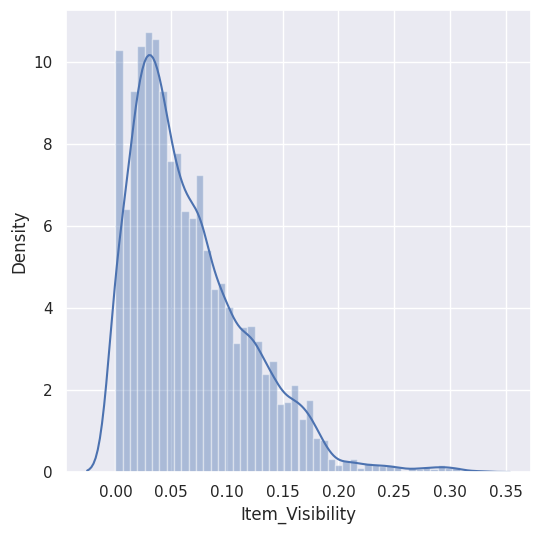

In [ ]:
# Item_weight distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mark_data['Item_Visibility'])
plt.show()

<ipython-input-81-2583cd3f8501>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mark_data['Item_MRP'])


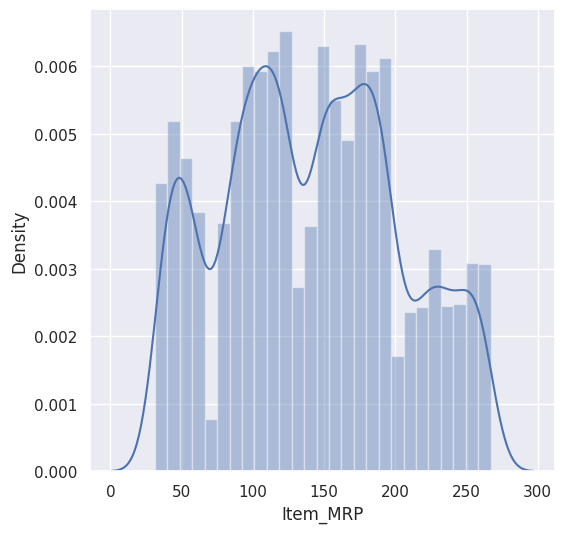

In [ ]:
# Item_weight distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mark_data['Item_MRP'])
plt.show()

<ipython-input-19-52ea722ca161>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mark_data['Outlet_Establishment_Year'])


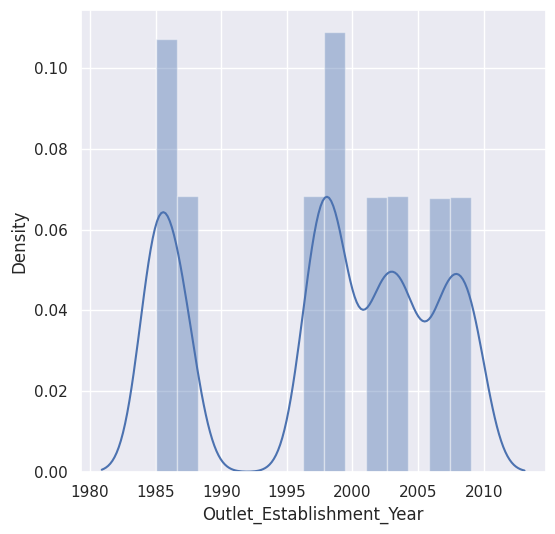

In [ ]:
# Outlet_Establishment_Year distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mark_data['Outlet_Establishment_Year'])
plt.show()

<Figure size 600x600 with 0 Axes>

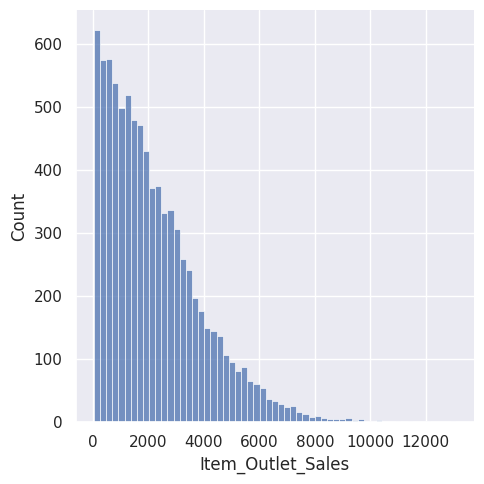

In [ ]:
# Item_Outlet_Sales distribution
plt.figure(figsize=(6,6))
sns.displot(big_mark_data['Item_Outlet_Sales'])
plt.show()

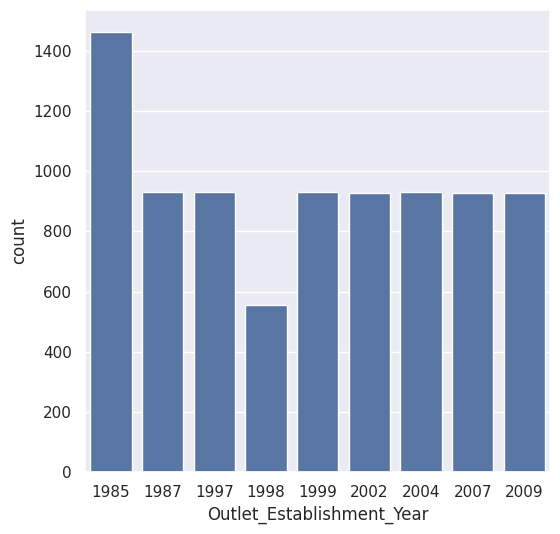

In [ ]:
plt.figure(figsize = ( 6 , 6 ))
sns.countplot(x = 'Outlet_Establishment_Year' , data = big_mark_data)
plt.show()

Categorical feature

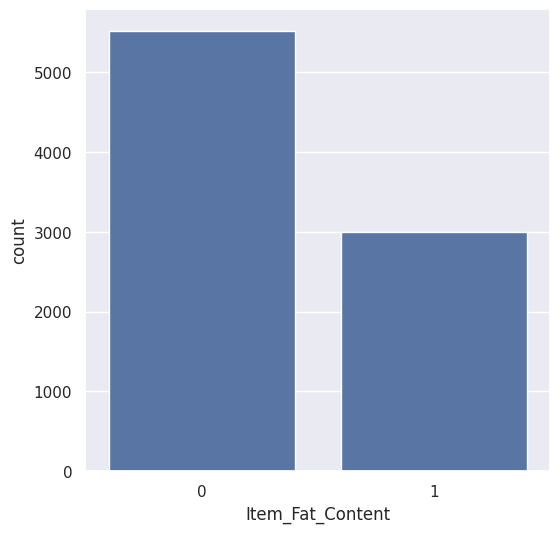

In [ ]:

# Item_Fat_Content column
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=big_mark_data)
plt.show()

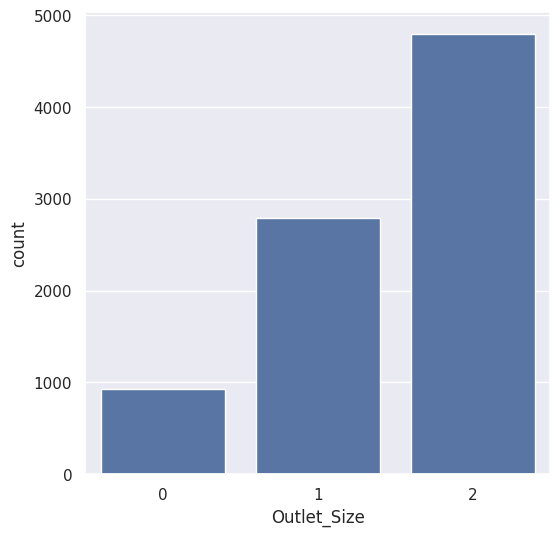

In [ ]:

# Outlet_Size column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data=big_mark_data)
plt.show()

In [ ]:

big_mark_data['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
0,5517
1,3006


In [93]:
big_mark_data.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)


In [94]:

big_mark_data['Item_Fat_Content'].value_counts()


,count
Item_Fat_Content,
0,5517
1,3006


In [95]:

encoder = LabelEncoder()

In [97]:

big_mark_data['Item_Identifier'] = encoder.fit_transform(big_mark_data['Item_Identifier'])

big_mark_data['Item_Fat_Content'] = encoder.fit_transform(big_mark_data['Item_Fat_Content'])

big_mark_data['Item_Type'] = encoder.fit_transform(big_mark_data['Item_Type'])

big_mark_data['Outlet_Identifier'] = encoder.fit_transform(big_mark_data['Outlet_Identifier'])

big_mark_data['Outlet_Size'] = encoder.fit_transform(big_mark_data['Outlet_Size'])

big_mark_data['Outlet_Location_Type'] = encoder.fit_transform(big_mark_data['Outlet_Location_Type'])

big_mark_data['Outlet_Type'] = encoder.fit_transform(big_mark_data['Outlet_Type'])

spliting the data


In [99]:

X = big_mark_data.drop(columns='Item_Outlet_Sales', axis=1)
Y = big_mark_data['Item_Outlet_Sales']

In [100]:
print( X)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

In [101]:
print( Y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


In [102]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [103]:

print(X.shape, X_train.shape, X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


In [104]:

regressor = XGBRegressor()

In [105]:

regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evaluation

In [106]:



# prediction on training data
training_data_prediction = regressor.predict(X_train)

In [107]:
# R squared Value
r2_train = metrics.r2_score(Y_train, training_data_prediction)

In [108]:

print('R Squared value = ', r2_train)

R Squared value =  0.8762174618111388


In [109]:
# prediction on test data
test_data_prediction = regressor.predict(X_test)

In [110]:

# R squared Value
r2_test = metrics.r2_score(Y_test, test_data_prediction)


In [111]:

print('R Squared value = ', r2_test)

R Squared value =  0.5017253991620692


In [112]:
input_data = {
    'Item_Identifier': 1575,
    'Item_Weight': 9.3,
    'Item_Fat_Content': 0,  # e.g., Low Fat
    'Item_Visibility': 0.016047,
    'Item_Type': 4,
    'Item_MRP': 249.8092,
    'Outlet_Identifier': 9,
    'Outlet_Establishment_Year': 1999,
    'Outlet_Size': 1,  # e.g., Medium
    'Outlet_Location_Type': 1,
    'Outlet_Type': 1
}

# Convert to DataFrame
input_df = pd.DataFrame([input_data])

# Predict the sales
predicted_sales = regressor.predict(input_df)

print("Predicted Item Outlet Sales: ₹", round(predicted_sales[0], 2))

Predicted Item Outlet Sales: ₹ 5756.25
